<a href="https://colab.research.google.com/github/Tidnom/cardio-vascular-disease-predictor/blob/main/cardiVascularDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('cardiovasculardata.xlsx')
df.to_csv('cardiovasculardata.csv', index=False)

In [ ]:
df.head

<bound method NDFrame.head of           id    age  gender  height in cm  weight in kg  ap_hi  ap_lo  \
0          0  18393       2           168            62    110     80   
1          1  20228       1           156            85    140     90   
2          2  18857       1           165            64    130     70   
3          3  17623       2           169            82    150    100   
4          4  17474       1           156            56    100     60   
...      ...    ...     ...           ...           ...    ...    ...   
69995  99993  19240       2           168            76    120     80   
69996  99995  22601       1           158           126    140     90   
69997  99996  19066       2           183           105    180     90   
69998  99998  22431       1           163            72    135     80   
69999  99999  20540       1           170            72    120     80   

       cholesterol  gluc  smoke  alco  active  cardio  
0                1     1      0     0       1       0  
1                3     1      0     0       1       1  
2                3     1      0     0       0       1  
3                1     1      0     0       1       1  
4                1     1      0     0       0       0  
...            ...   ...    ...   ...     ...     ...  
69995            1     1      1     0       1       0  
69996            2     2      0     0       1       1  
69997            3     1      0     1       0       1  
69998            1     2      0     0       0       1  
69999            2     1      0     0       1       0  

[70000 rows x 13 columns]>

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df['age'] = (df['age']/365).astype(int)
df.head()

,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0


Text(0.5, 1.0, 'Target Variable Distribution (0 = No Disease, 1 = Disease)')

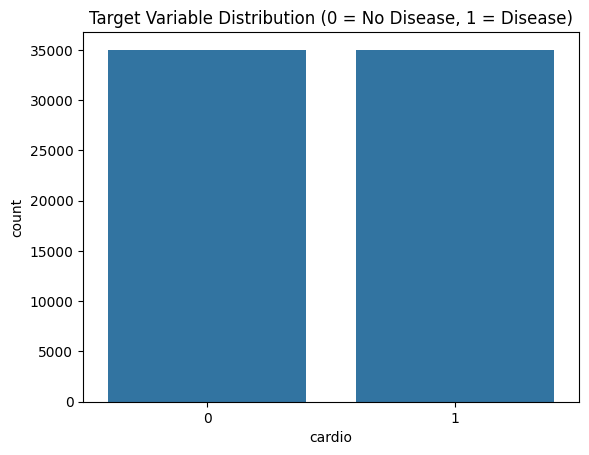

In [ ]:
sns.countplot(data=df, x="cardio")
plt.title("Target Variable Distribution (0 = No Disease, 1 = Disease)")

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


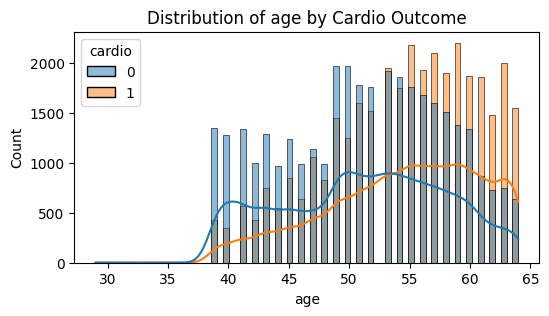

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


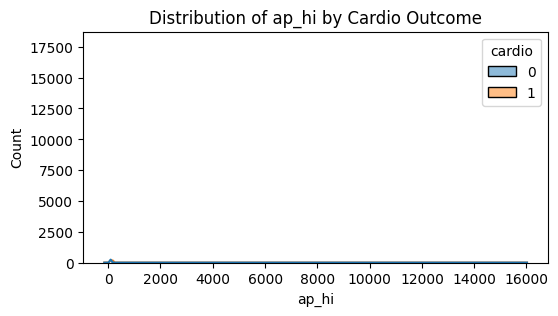

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


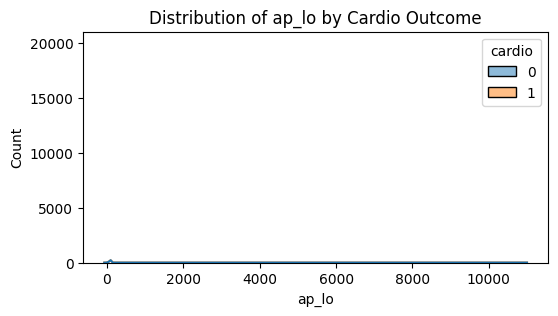

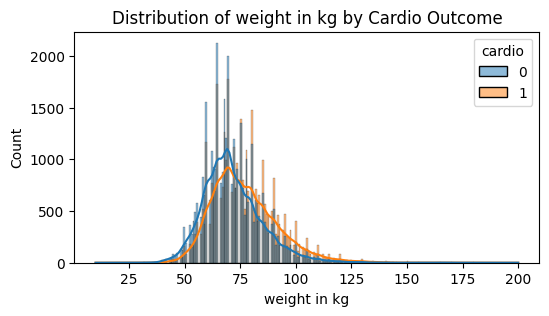

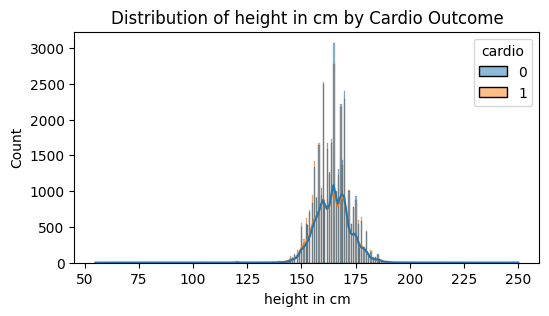

In [ ]:
cols = ["age", "ap_hi", "ap_lo", "weight in kg", "height in cm"]

for col in cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, hue="cardio", kde=True)
    plt.title(f"Distribution of {col} by Cardio Outcome")


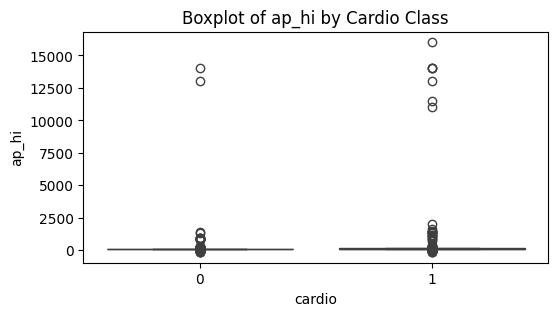

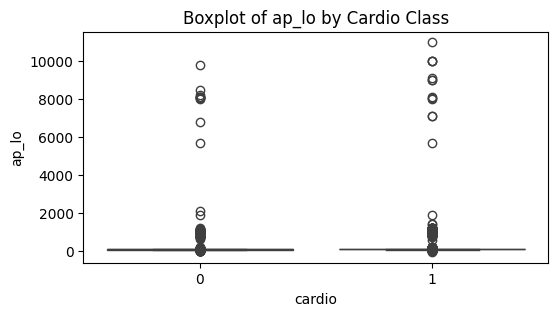

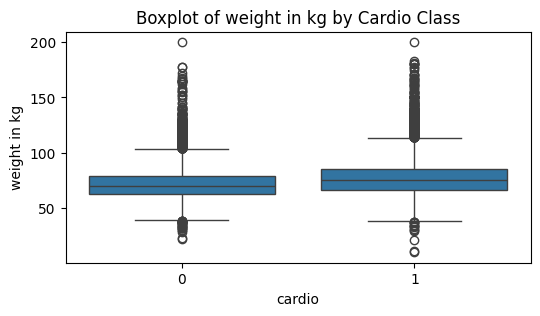

In [ ]:
for col in ["ap_hi", "ap_lo", "weight in kg"]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x="cardio", y=col)
    plt.title(f"Boxplot of {col} by Cardio Class")


In [ ]:
df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 60) & (df['ap_lo'] <= 180)]
df = df[(df['weight in kg'] >= 30) & (df['weight in kg'] <= 180)]


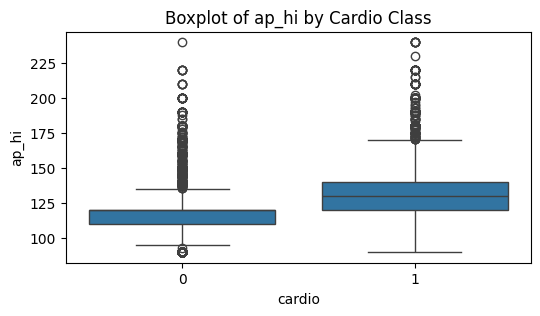

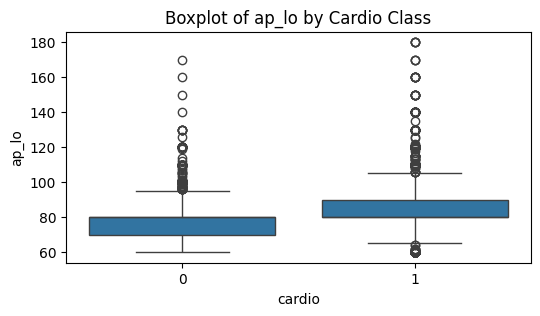

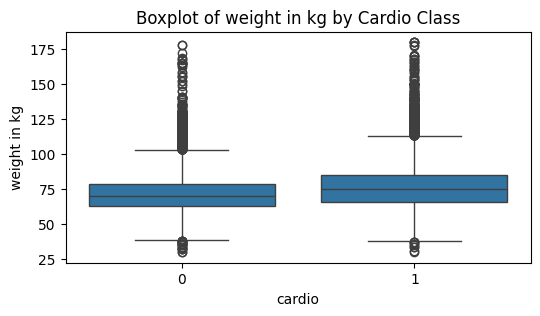

In [ ]:
for col in ["ap_hi", "ap_lo", "weight in kg"]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x="cardio", y=col)
    plt.title(f"Boxplot of {col} by Cardio Class")


Text(0.5, 1.0, 'Correlation Heatmap')

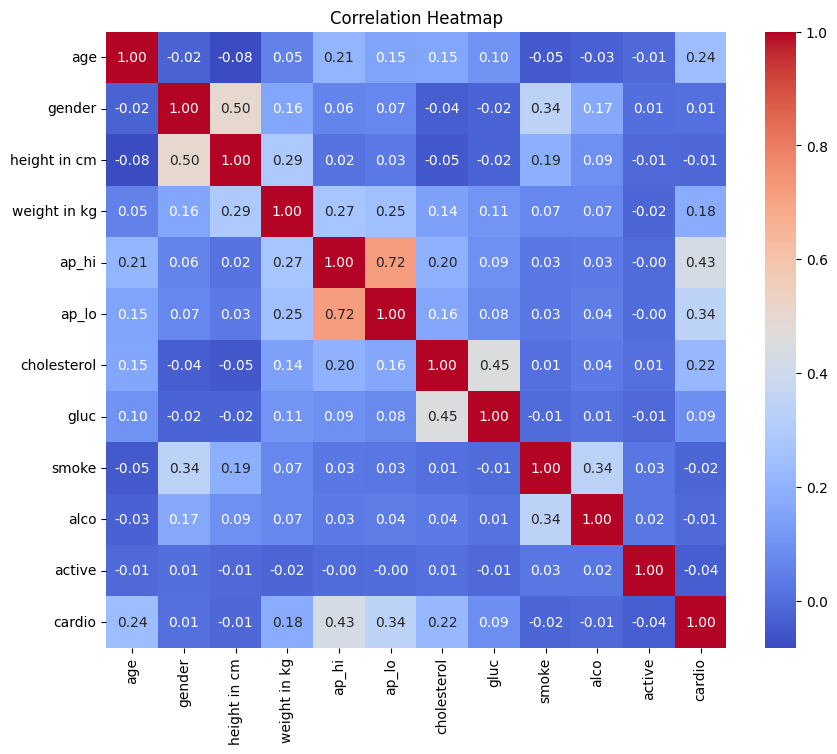

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")


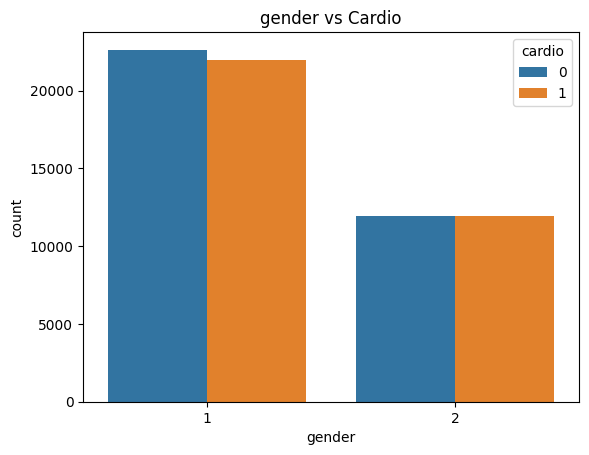

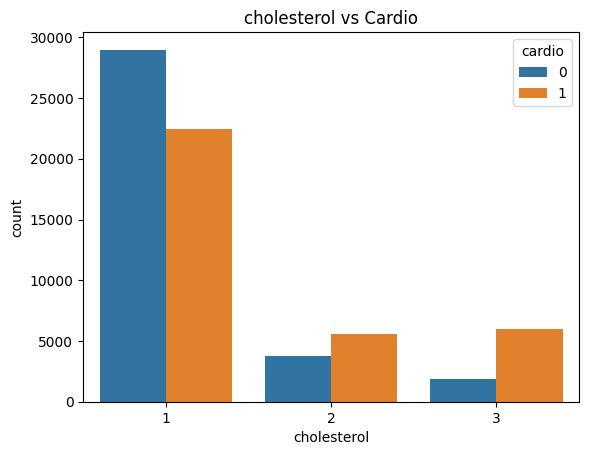

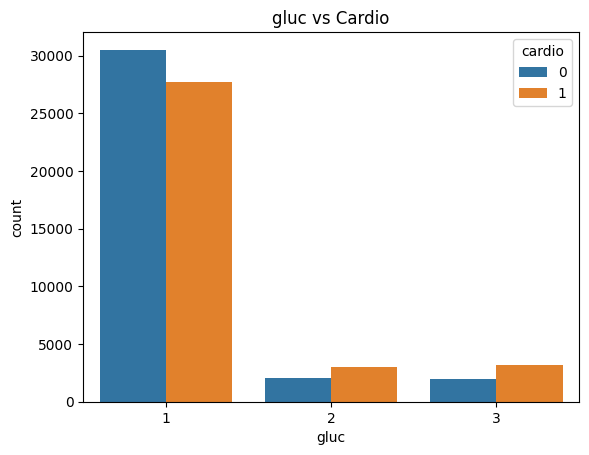

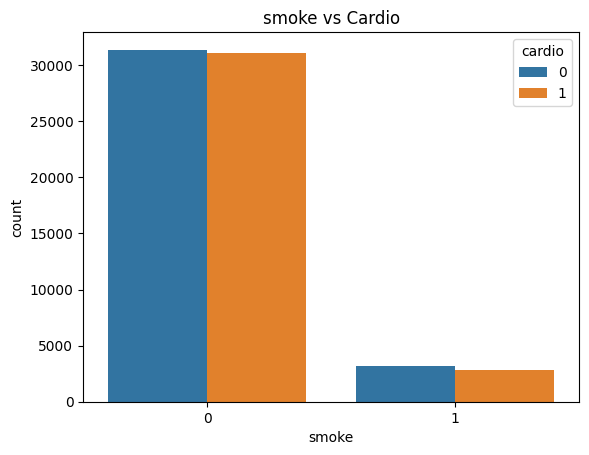

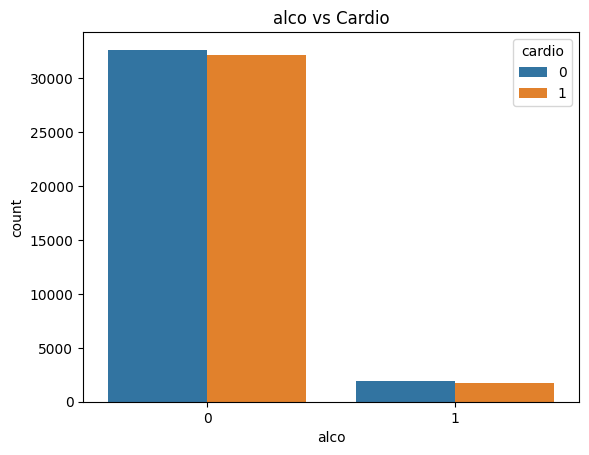

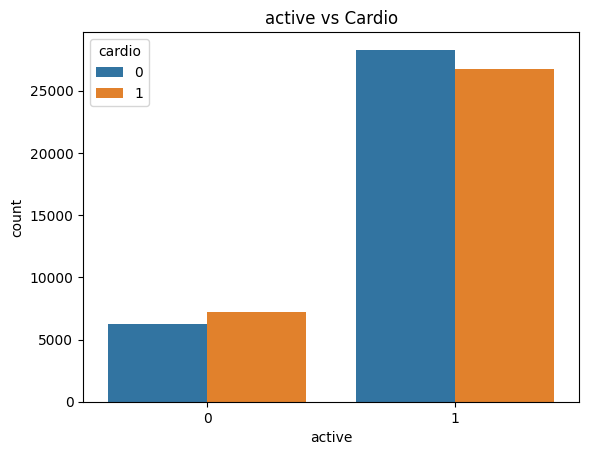

In [ ]:
cat_features = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

for col in cat_features:
    sns.countplot(data=df, x=col, hue="cardio")
    plt.title(f"{col} vs Cardio")
    plt.show()


In [ ]:
import pandas as pd

# Read the file as if it's a CSV but:
# - no header row → header=None
# - missing values marked as '?' → na_values='?'

df = pd.read_csv("processed.switzerland.data", header=None, na_values='?')